# DNNLikelihood tutorial 

## Initialize

In [1]:
import sys
sys.dont_write_bytecode = True
#sys.path.append(r'C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev_old\source') #old
sys.path.append(r'C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\source') #new
import DNNLikelihood

from jupyterthemes import jtplot
jtplot.reset()

## Debug sampler

In [1]:
import emcee
import importlib
import sys
from multiprocessing import Pool
import psutil

In [3]:
#sys.path.insert(0, "../../../DNNLikelihood_dev_old/tutorials/toy/outfiles")
sys.path.insert(0, "outfiles")
from toy_likelihood_script import *
#lik = importlib.import_module("toy_likelihood_script")
nwalkers = len(pars_init_vec)
ndims = len(pars_init_vec[0])
p0 = pars_init_vec
nsteps_to_run = 1000

new script
Loaded likelihood in 0.01065330000000042 .
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0094776999999997 s.
Likelihood pickle file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.pickle saved in 0.009904200000000252 s.
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.0038458000000005654 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.008868400000000776 s.


In [4]:
backend = emcee.backends.HDFBackend("outfiles/prova_backend", name="prova")
backend.reset(nwalkers, ndims)

In [5]:
n_processes = psutil.cpu_count(logical=False)
with Pool(n_processes) as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndims, logpdf, moves=emcee.moves.StretchMove(), pool=pool, backend=backend, args=logpdf_args)
    sampler.run_mcmc(p0, nsteps_to_run, progress=True, store = True)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.97it/s]


In [2]:
sys.path.insert(0, "outfiles")
lik = importlib.import_module("toy_likelihood_script")
nwalkers = len(lik.pars_init_vec)
ndims = len(lik.pars_init_vec[0])
p0 = lik.pars_init_vec
nsteps_to_run = 1000

Likelihood loaded in 0.006819099999999523 .
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.002976900000000171 s.
Likelihood pickle file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.pickle saved in 0.00889080000000142 s.
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.0035337999999995873 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.00276430000000083 s.


In [3]:
backend = emcee.backends.HDFBackend("outfiles/prova_backend", name="prova")
backend.reset(nwalkers, ndims)

In [4]:
n_processes = psutil.cpu_count(logical=False)
with Pool(n_processes) as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndims, lik.logpdf, moves=emcee.moves.StretchMove(), pool=pool, backend=backend, args=lik.logpdf_args)
    sampler.run_mcmc(p0, nsteps_to_run, progress=True, store = True)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.61it/s]


## Histfactory

In [2]:
histfact = DNNLikelihood.Histfactory(workspace_folder="../../tutorials/ATLAS/HEPData_workspaces",
                                     name = "ATLAS_sbottom_search",
                                     output_folder = "outfiles")

Successfully imported 649 likelihoods from 3 regions.
Histfactory pickle file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_histfactory.pickle saved in 0.0022788000000009134 s.
Histfactory json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_histfactory.json saved in 0.0012866000000002487 s.
Histfactory log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_histfactory.log saved in 0.002426999999999069 s.


In [3]:
histfact = DNNLikelihood.Histfactory(histfactory_input_file="outfiles/ATLAS_sbottom_search_histfactory")

Loaded likelihoods in 0.017978199999999944 seconds.
File size is  176003 .
Histfactory log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_histfactory.log saved in 0.002081399999999789 s.


In [4]:
pippo = list(histfact.__dict__.keys())
pippo.sort()
pippo

['bkg_files_base_name',
 'histfactory_input_file',
 'histfactory_input_json_file',
 'histfactory_input_log_file',
 'histfactory_input_pickle_file',
 'histfactory_output_json_file',
 'histfactory_output_log_file',
 'histfactory_output_pickle_file',
 'likelihoods_dict',
 'log',
 'name',
 'output_folder',
 'patch_files_base_name',
 'regions',
 'regions_folders_base_name',
 'verbose',
 'workspace_folder']

In [5]:
histfact.likelihoods_dict[0]

{'signal_region': 'A',
 'bg_only_file': 'C:\\Users\\Admin\\Dropbox\\Work\\09_Resources\\Git\\GitHub\\DNNLikelihood\\DNNLikelihood_dev\\tutorials\\ATLAS\\HEPData_workspaces\\RegionA\\BkgOnly.json',
 'patch_file': 'C:\\Users\\Admin\\Dropbox\\Work\\09_Resources\\Git\\GitHub\\DNNLikelihood\\DNNLikelihood_dev\\tutorials\\ATLAS\\HEPData_workspaces\\RegionA\\patch.sbottom_1000_131_1.json',
 'name': 'ATLAS_sbottom_search_histfactory_0_region_A_patch_sbottom_1000_131_1_likelihood',
 'model_loaded': False}

In [6]:
histfact.import_histfactory(lik_numbers_list=[0])

C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\ATLAS\HEPData_workspaces\RegionA\patch.sbottom_1000_131_1.json processed in 0.7835044 s.
Histfactory log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_histfactory.log saved in 0.0026522999999993857 s.
Imported 1 likelihoods in  0.7836628999999995 s.


In [7]:
histfact.likelihoods_dict[0]

{'signal_region': 'A',
 'bg_only_file': 'C:\\Users\\Admin\\Dropbox\\Work\\09_Resources\\Git\\GitHub\\DNNLikelihood\\DNNLikelihood_dev\\tutorials\\ATLAS\\HEPData_workspaces\\RegionA\\BkgOnly.json',
 'patch_file': 'C:\\Users\\Admin\\Dropbox\\Work\\09_Resources\\Git\\GitHub\\DNNLikelihood\\DNNLikelihood_dev\\tutorials\\ATLAS\\HEPData_workspaces\\RegionA\\patch.sbottom_1000_131_1.json',
 'name': 'ATLAS_sbottom_search_histfactory_0_region_A_patch_sbottom_1000_131_1_likelihood',
 'model_loaded': True,
 'model': <pyhf.pdf.Model at 0x23bb9e51e88>,
 'obs_data': array([153.,  52.,  19.,  12.,   3.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.

In [8]:
histfact.save_histfactory()

Histfactory pickle file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_histfactory.pickle saved in 0.0063248999999991895 s.
Histfactory json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_histfactory.json saved in 0.0006799999999991257 s.
Histfactory log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_histfactory.log saved in 0.0037553000000016823 s.


In [9]:
likelihood_0 = histfact.get_likelihood_object(lik_number=0)

Likelihood pickle file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_0_region_A_patch_sbottom_1000_131_1_likelihood.pickle saved in 0.11981330000000057 s.
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_0_region_A_patch_sbottom_1000_131_1_likelihood.json saved in 0.0022401000000016325 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_0_region_A_patch_sbottom_1000_131_1_likelihood.log saved in 0.0011665999999976862 s.
Likelihood object for likelihood 0 created and saved to files C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_0_region_A_patch_sbottom_1000_131_1_likelihood.json and C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitH

## Likelihood

### Define likelihood function

In [2]:
import numpy as np

In [3]:
nbI_nominal = np.array(list(reversed([i for i in range(100,1100,100)])))
nbI_obs = np.random.poisson(nbI_nominal)
nsI_reference = np.array(list(reversed([i for i in range(10,110,10)])))
[len(nbI_nominal),len(nbI_obs),len(nsI_reference)]

[10, 10, 10]

In [4]:
def nbI(delta):
    delta = np.array(delta)
    return np.array([nbI_nominal[i]*(1+0.1)**delta[i] for i in range(len(delta))])
def nsI(mu):
    return mu*nsI_reference
def nI(pars):
    mu = pars[0]
    delta = pars[1:]
    return np.array(nsI(mu)+nbI(delta))
def loglik(pars, obs):
    exp = nI(pars)
    logfact = np.array(list(map(lambda x: np.math.lgamma(x+1), obs)))
    return np.sum(-1*logfact+obs*np.log(exp)-exp)
def logprior(pars):
    mu = pars[0]
    delta = pars[1:]
    delta_prior = -1/2*np.sum(delta**2+np.full(len(delta),np.log(2*np.pi)))
    return delta_prior-np.log(1/(10))
def logpdf(pars, obs):
    return loglik(pars, obs)+logprior(pars)

In [5]:
nbI(np.random.normal(0,1,10))

array([1045.77692429,  900.78624017,  777.36250303,  725.58757545,
        621.71179103,  485.42064287,  391.5465431 ,  343.19126953,
        178.90456237,  100.24835202])

In [6]:
nsI(1.1)

array([110.,  99.,  88.,  77.,  66.,  55.,  44.,  33.,  22.,  11.])

In [7]:
nI(np.insert(np.random.normal(0,1,10),0,1.1))

array([1063.13040669,  972.9323286 ,  817.20005131,  775.07502268,
        704.71885331,  531.90252465,  492.65033812,  377.15324313,
        226.3134147 ,  110.73819805])

In [8]:
logpdf(np.insert(np.random.normal(0,1,10),0,1.1), nbI_obs)

-94.58972655054107

In [9]:
pars_pos_poi = [0]
pars_pos_nuis = range(1,11)
pars_init = np.insert(np.full(10,0),0,1)
pars_bounds = np.concatenate((np.array([[-5,5]]),
                              np.vstack([np.full(10,-np.inf),
                                         np.full(10,np.inf)]).T))

### Initialize Likelihood object

In [10]:
likelihood = DNNLikelihood.Likelihood(name = 'toy',
                                      logpdf = logpdf,
                                      logpdf_args = [nbI_obs],
                                      pars_pos_poi = pars_pos_poi,
                                      pars_pos_nuis = pars_pos_nuis,
                                      pars_init = pars_init,
                                      pars_labels = None,
                                      pars_bounds = pars_bounds,
                                      output_folder = "outfiles")

Likelihood pickle file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.pickle saved in 0.008924199999995608 s.
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.0013920999999967876 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0010675999999989472 s.


In [11]:
likelihood = DNNLikelihood.Likelihood(likelihood_input_file="outfiles/toy_likelihood")

Loaded likelihood in 0.0059525000000064665 .
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.0013731000000021254 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0010776000000021213 s.


In [12]:
likelihood.logpdf_fn(likelihood.pars_init,*likelihood.logpdf_args)

-79.98032908692859

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood_figure_par_0.pdf.


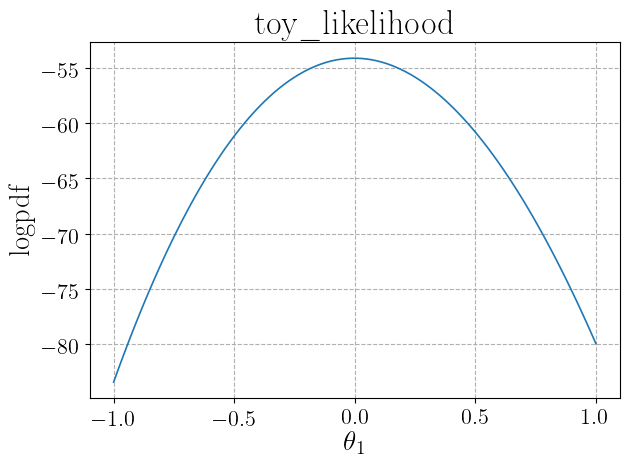

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood_figure_par_5.pdf.


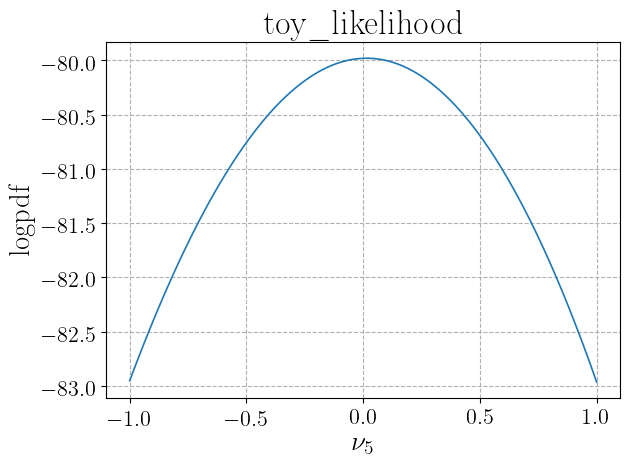

Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.001148900000004005 s.


In [13]:
likelihood.plot_logpdf_par([[0,-1,1],[5,-1,1]],overwrite=True)

In [14]:
likelihood.compute_maximum_logpdf()
print(likelihood.X_logpdf_max)
print(likelihood.Y_logpdf_max)

Maximum likelihood computed in 0.02802239999999756 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0012168000000087886 s.
[ 2.55763605e-05  2.82983124e-02 -3.37184507e-01 -1.50840656e-01
 -2.35420479e-01  8.69972454e-01 -5.62475453e-01  1.83830594e-01
 -7.69818222e-02  9.84334557e-01 -3.01713730e-01]
48.2726883985562


In [15]:
likelihood.compute_profiled_maxima(pars=[0],pars_ranges=[[-1,1,50]],spacing="grid",verbose=2)
print(likelihood.X_prof_logpdf_max)
print(likelihood.Y_prof_logpdf_max)

FloatProgress(value=0.0, layout=Layout(height='14px', margin='-5px 0px -20px 0px', padding='0px', width='500px…

Total number of points: 50 .
Log-pdf values lie in the range [ 48.27058263662602 , 52.67162479024045 ]
50 local maxima computed in 1.4293029000000104 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0015765999999928226 s.
[[-1.00000000e+00  9.42738118e-01  5.93341032e-01  7.56381617e-01
   6.63445975e-01  1.68888904e+00  3.11190649e-01  9.89562602e-01
   6.91144234e-01  1.65334346e+00  2.09529167e-01]
 [-9.59183673e-01  9.06528179e-01  5.56440712e-01  7.20332009e-01
   6.27647101e-01  1.65621802e+00  2.76107874e-01  9.57104031e-01
   6.59922916e-01  1.62594868e+00  1.87853753e-01]
 [-9.18367347e-01  8.70225234e-01  5.19448779e-01  6.84207578e-01
   5.91769202e-01  1.62349773e+00  2.40981649e-01  9.24604835e-01
   6.28690584e-01  1.59863357e+00  1.66244271e-01]
 [-8.77551020e-01  8.33828433e-01  4.82365144e-01  6.48000651e-01
   5.55816334e-01  1.59068037e+00  2.05797538e-01  8

In [16]:
likelihood.save_likelihood_script()

File C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood_script.py correctly generated.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0009750999999909027 s.


In [17]:
likelihood.save_likelihood(overwrite=True)

Likelihood pickle file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.pickle saved in 0.008539200000001301 s.
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.0036496999999968693 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0010946999999958962 s.


In [18]:
likelihood_attrs = list(likelihood.__dict__.keys())
likelihood_attrs.sort()
likelihood_attrs

['X_logpdf_max',
 'X_prof_logpdf_max',
 'X_prof_logpdf_max_tmp',
 'Y_logpdf_max',
 'Y_prof_logpdf_max',
 'Y_prof_logpdf_max_tmp',
 'figure_files_base_path',
 'figures_list',
 'generic_pars_labels',
 'likelihood_input_file',
 'likelihood_input_json_file',
 'likelihood_input_log_file',
 'likelihood_input_pickle_file',
 'likelihood_output_json_file',
 'likelihood_output_log_file',
 'likelihood_output_pickle_file',
 'likelihood_script_file',
 'log',
 'logpdf',
 'logpdf_args',
 'name',
 'ndims',
 'output_folder',
 'pars_bounds',
 'pars_init',
 'pars_labels',
 'pars_pos_nuis',
 'pars_pos_poi',
 'verbose']

## Sampler

### Make sampler from "likelihood"

In [2]:
likelihood = DNNLikelihood.Likelihood(likelihood_input_file="outfiles/toy_likelihood")

Loaded likelihood in 0.0074492999999975495 .
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.0037109000000015158 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.004065000000000651 s.


In [3]:
Sampler1 = DNNLikelihood.Sampler(new_sampler=True,
                                 likelihood_script_file=None,#"outfiles/ATLAS_sbottom_search_92_region_A_patch_sbottom_1400_450_60_likelihood_script.py",#None,#
                                 likelihood=likelihood,#None,#
                                 nsteps_final=1000,
                                 moves_str=None,#"[(emcee.moves.StretchMove(), 0), (emcee.moves.GaussianMove(0.0002, mode='random',factor=None),1)]",
                                 parallel_CPU=True,
                                 vectorize=False,
                                 sampler_input_file=None,
                                 verbose=1)

No moves_str parameter has been specified. moves has been set to the default StretchMove() of emcee.
File C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood_script.py correctly generated.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.003729700000000946 s.
Loaded likelihood in 0.006490599999999347 .
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.0038103999999989924 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.004377999999999105 s.
Initialize backend in file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 

In [4]:
Sampler1.run_sampler(verbose=2)

Initial number of steps: 0 .
Running 44 parallel processes.


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 71.19it/s]


Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0008939000000012243 s.
Done in 29.2747177 seconds.
Final number of steps: 1000. .


In [3]:
Sampler2 = DNNLikelihood.Sampler(new_sampler=False,
                                 likelihood_script_file=None,#"outfiles/ATLAS_sbottom_search_92_region_A_patch_sbottom_1400_450_60_likelihood_script.py",#None,#
                                 likelihood=likelihood,#None,#
                                 nsteps_final=2000,
                                 moves_str="[(emcee.moves.StretchMove(), 0), (emcee.moves.GaussianMove(0.0002, mode='random',factor=None),1)]",
                                 parallel_CPU=True,
                                 vectorize=False,
                                 sampler_input_file=None,
                                 verbose=1)

File C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood_script.py correctly generated.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.00423030000000324 s.
Loaded sampler in 0.005567200000001549 .
Loaded likelihood in 0.006058299999999406 .
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.003299899999994693 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.003940400000004729 s.
Initialize backend from file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 .
Please increase nsteps to run for more steps
Number of ava

In [4]:
Sampler2.new_sampler

False

In [5]:
Sampler2.run_sampler(verbose=2)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

Initial number of steps: 1000 .
Running 44 parallel processes.


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.87it/s]


Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0010724000000124079 s.
Done in 30.186892199999996 seconds.
Final number of steps: 2000. .


### Make sampler from "likelihood_script_file"

In [3]:
Sampler1 = DNNLikelihood.Sampler(new_sampler=True,
                                 likelihood_script_file="outfiles/toy_likelihood_script",#None,#
                                 likelihood=None,#lik,#
                                 nsteps_final=1000,
                                 moves_str="[(emcee.moves.StretchMove(), 0), (emcee.moves.GaussianMove(0.0002, mode='random',factor=None),1)]",
                                 parallel_CPU=True,
                                 vectorize=False,
                                 sampler_input_file=None,
                                 verbose=1)

Loaded likelihood in 0.00992159999999842 .
Likelihood pickle file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.pickle saved in 0.0072819999999893525 s.
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.0030409000000020114 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0068199999999905 s.
Initialize backend in file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 .
Please increase nsteps to run for more steps
Number of available steps: 0. .
Created backend C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 for chains toy_sampler in 0.02

In [ ]:
Sampler1.run_sampler()

Initial number of steps: 0 .


In [2]:
Sampler2 = DNNLikelihood.Sampler(new_sampler=False,
                                 likelihood_script_file="outfiles/toy_likelihood_script",#None,#
                                 likelihood=None,#lik,#
                                 nsteps_final=2000,
                                 moves_str="[(emcee.moves.StretchMove(), 0), (emcee.moves.GaussianMove(0.0002, mode='random',factor=None),1)]",
                                 parallel_CPU=True,
                                 vectorize=False,
                                 sampler_input_file=None,
                                 verbose=1)

Loaded sampler log in 0.005788400000000138 .
Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.000964299999999696 s.
Loaded sampler in 0.0005152000000006041 .
Likelihood loaded in 0.007398699999999536 .
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0028817000000014303 s.
Initialize backend in file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 .
Initial number of steps: 0 .
Please increase nsteps to run for more steps
Done in 0.006171600000000055 seconds.
Final number of steps: 0. .
Loaded backend C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 for chains toy_sampler in 0.015173299999998946 s.
Available number of st

In [3]:
Sampler2.run_sampler()

Initial number of steps: 0 .
Running 44 parallel processes.


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:46<00:00, 43.26it/s]


Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0011212000000000444 s.
Done in 53.91474720000001 seconds.
Final number of steps: 2000. .


### Make sampler from "sampler_input_file"

In [2]:
Sampler1 = DNNLikelihood.Sampler(new_sampler=True,
                                 likelihood_script_file=None,#"outfiles/ATLAS_sbottom_search_92_region_A_patch_sbottom_1400_450_60_likelihood_script",#
                                 likelihood=None,#lik,#
                                 nsteps_final=50000,
                                 moves_str="[(emcee.moves.StretchMove(), 0), (emcee.moves.GaussianMove(0.0002, mode='random',factor=None),1)]",
                                 parallel_CPU=True,
                                 vectorize=False,
                                 sampler_input_file="outfiles/toy_sampler",
                                 verbose=1)

Loaded likelihood in 0.013512699999999711 .
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.003781199999998819 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.03162739999999964 s.
The file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 already exists. Renaming the old file.
Initialize backend in file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 .
Number of available steps: 0. .
Created backend C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 for chains toy_sampler in 0.026993199999999717 s.
The file C:\Users\Admin\Dropbox\

In [ ]:
Sampler1.run_sampler()

Initial number of steps: 0 .


In [15]:
Sampler1.save_sampler(overwrite=True)

Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.json saved in 0.0011090999978478067 s.
Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0007766000016999897 s.


In [2]:
Sampler2 = DNNLikelihood.Sampler(new_sampler=False,
                                 likelihood_script_file=None,#"outfiles/ATLAS_sbottom_search_92_region_A_patch_sbottom_1400_450_60_likelihood_script",
                                 likelihood=None,#lik,#
                                 nsteps_final=3000,
                                 moves_str="[(emcee.moves.StretchMove(), 0), (emcee.moves.GaussianMove(0.0002, mode='random',factor=None),1)]",
                                 parallel_CPU=True,
                                 vectorize=False,
                                 sampler_input_file="outfiles/toy_sampler",
                                 verbose=1)

Loaded sampler in 0.006453300000000439 .
Loaded likelihood in 0.006487299999999863 .
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.0030821000000003096 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0040004000000024575 s.
Initialize backend from file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 .
Please increase nsteps to run for more steps
Number of available steps: 2000. .
Loaded backend C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 for chains toy_sampler in 0.027955499999997357 s.
Sampler json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\o

In [3]:
[Sampler2.nsteps_final,Sampler2.nsteps_available]

[3000, 2000]

In [4]:
Sampler2.run_sampler(verbose=2)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

Initial number of steps: 2000 .
Running 44 parallel processes.


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 35.77it/s]


Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0022232999999971526 s.
Done in 28.556991500000002 seconds.
Final number of steps: 3000. .


In [5]:
[Sampler2.nsteps_final,Sampler2.nsteps_available]

[3000, 3000]

### Usage

In [2]:
Sampler2 = DNNLikelihood.Sampler(new_sampler=False,
                                 likelihood_script_file=None,#"outfiles/ATLAS_sbottom_search_92_region_A_patch_sbottom_1400_450_60_likelihood_script",
                                 likelihood=None,#lik,#
                                 nsteps_final=50000,
                                 moves_str="[(emcee.moves.StretchMove(), 0), (emcee.moves.GaussianMove(0.0002, mode='random',factor=None),1)]",
                                 parallel_CPU=True,
                                 vectorize=False,
                                 sampler_input_file="outfiles/toy_sampler",
                                 verbose=1)

Loaded sampler in 0.005976799999999116 .
Loaded likelihood in 0.006853400000000676 .
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.00406149999999883 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0038154999999999717 s.
Initialize backend from file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 .
Please increase nsteps to run for more steps
Number of available steps: 2000. .
Loaded backend C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 for chains toy_sampler in 0.02695579999999964 s.
Sampler json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outf

In [ ]:
Sampler2.run_sampler(verbose=2)

In [3]:
Sampler2.gelman_rubin(pars=[0,5],nsteps=[500,1000,5000,10000,50000])

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0014789000000003938 s.
Gelman-Rubin statistics for parameters [0 5] computed in 0.20234430000000003 s.


array([[0.00000000e+00, 5.00000000e+02, 1.11715830e+00, 2.27026284e-01,
        1.82322707e-01],
       [0.00000000e+00, 1.00000000e+03, 1.06160055e+00, 1.70164126e-01,
        1.51195692e-01],
       [0.00000000e+00, 2.00000000e+03, 1.18122150e+00, 1.47997689e-01,
        1.06866024e-01],
       [0.00000000e+00, 2.00000000e+03, 1.18122150e+00, 1.47997689e-01,
        1.06866024e-01],
       [0.00000000e+00, 2.00000000e+03, 1.18122150e+00, 1.47997689e-01,
        1.06866024e-01],
       [5.00000000e+00, 5.00000000e+02, 1.16417830e+00, 2.76225681e-01,
        2.04317268e-01],
       [5.00000000e+00, 1.00000000e+03, 1.08686870e+00, 2.57133085e-01,
        2.18197050e-01],
       [5.00000000e+00, 2.00000000e+03, 1.17662819e+00, 2.47520662e-01,
        1.80724089e-01],
       [5.00000000e+00, 2.00000000e+03, 1.17662819e+00, 2.47520662e-01,
        1.80724089e-01],
       [5.00000000e+00, 2.00000000e+03, 1.17662819e+00, 2.47520662e-01,
        1.80724089e-01]])

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0010759000000000185 s.
Gelman-Rubin statistics for parameters [0] computed in 0.20225169999999792 s.
Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_GR_Rc_0.pdf.


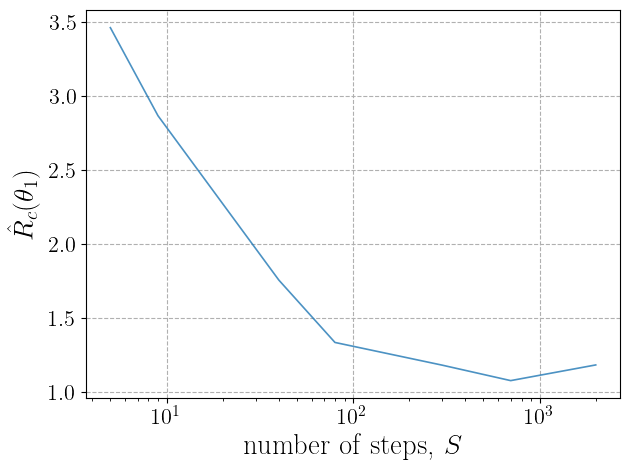

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_GR_sqrtVhat_0.pdf.


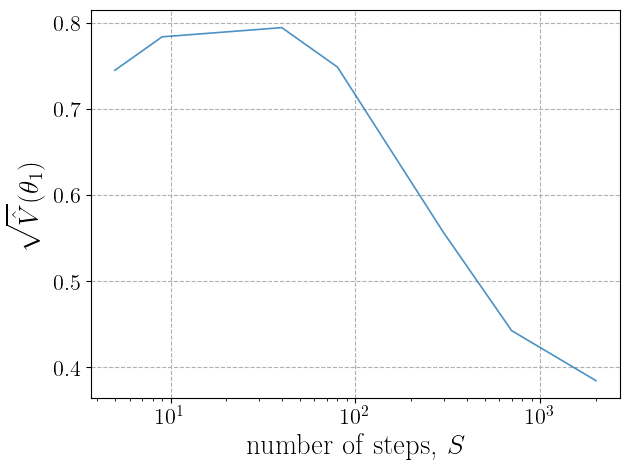

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_GR_sqrtW_0.pdf.


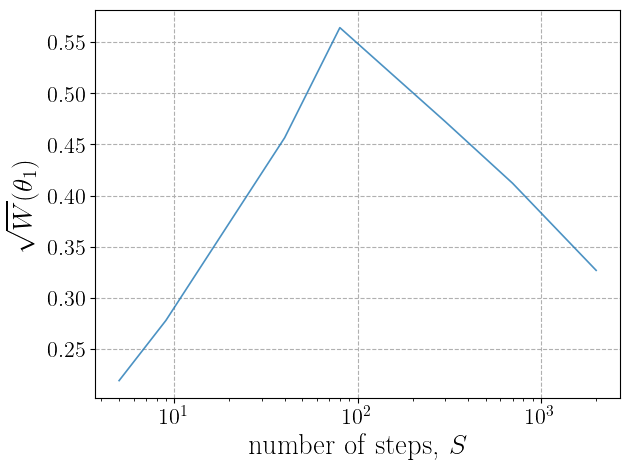

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0019698999999988587 s.
Gelman-Rubin statistics for parameters [5] computed in 0.21226009999999462 s.
Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_GR_Rc_5.pdf.


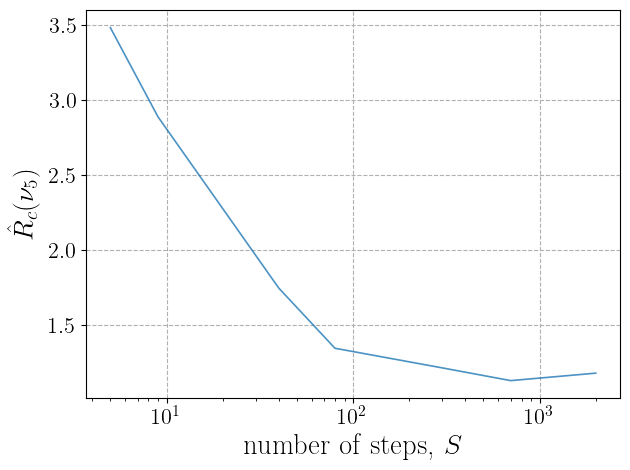

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_GR_sqrtVhat_5.pdf.


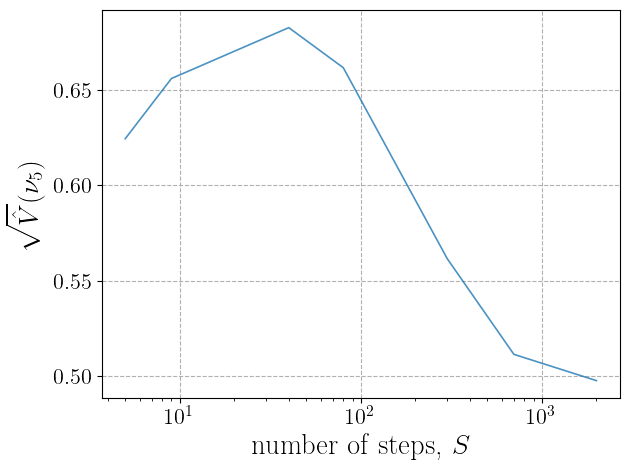

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_GR_sqrtW_5.pdf.


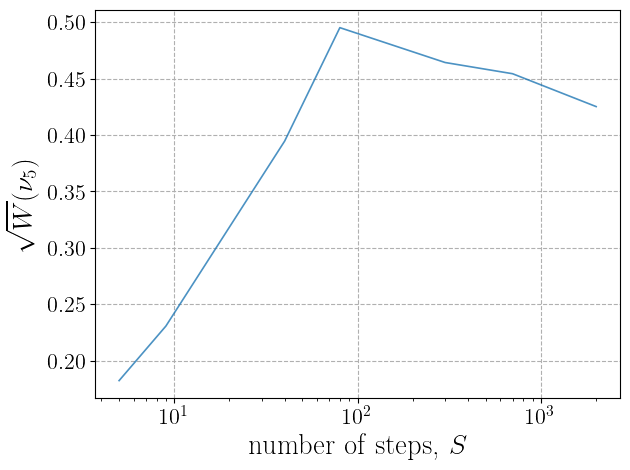

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.002234500000000139 s.


In [4]:
Sampler2.plot_gelman_rubin(pars=[0,5], npoints=10)

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_distr_0.pdf.


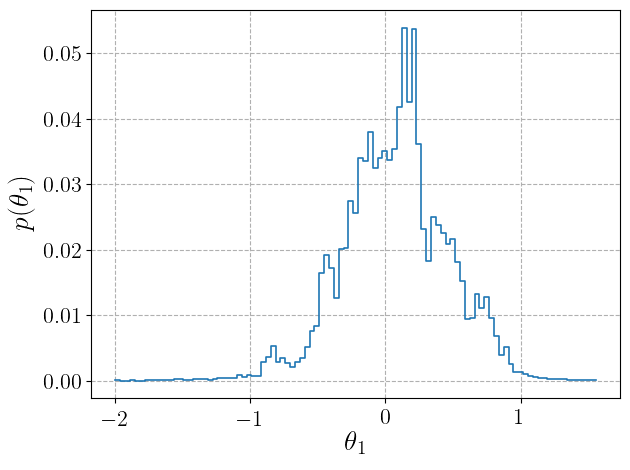

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_distr_5.pdf.


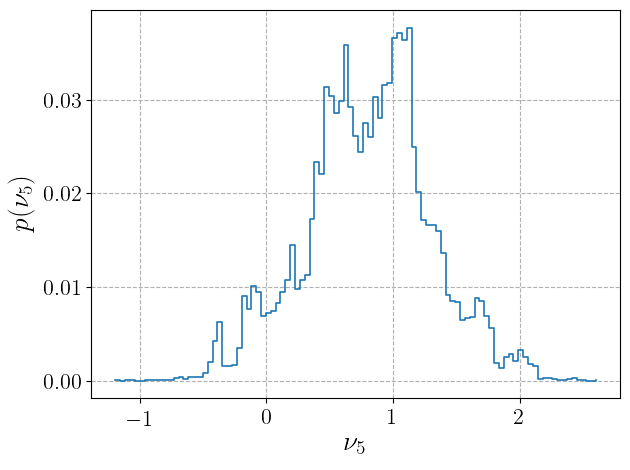

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0017592000000021812 s.


In [5]:
Sampler2.plot_dist(pars=[0,5])

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_autocorr_0.pdf.


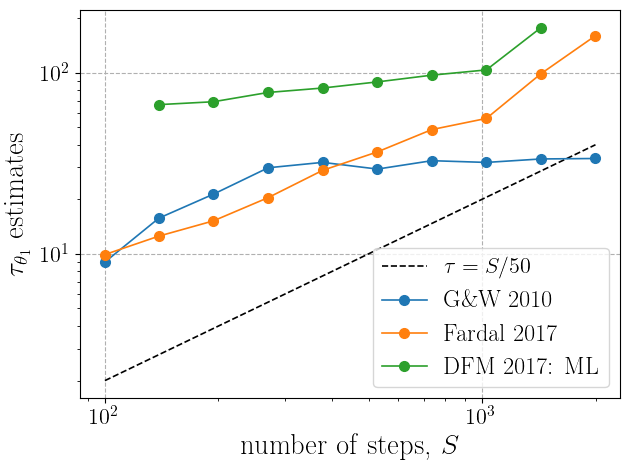

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_autocorr_5.pdf.


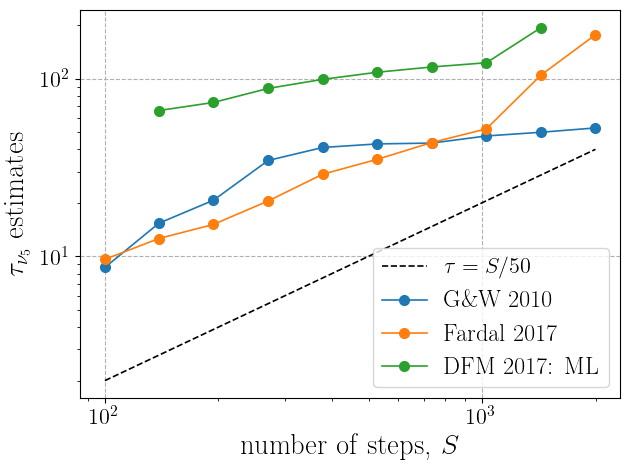

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.002024200000008136 s.


In [6]:
Sampler2.plot_autocorr(pars=[0,5])

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_chains_0.pdf.


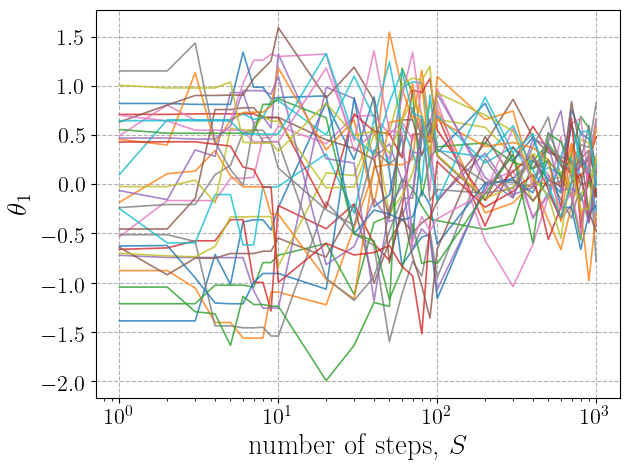

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_chains_5.pdf.


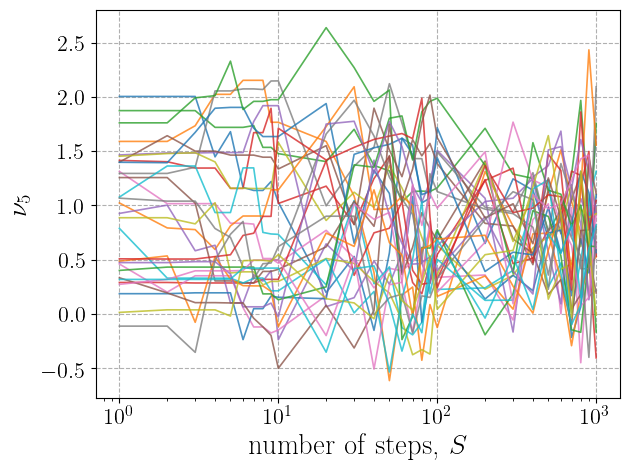

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0020004999999940765 s.


In [7]:
Sampler2.plot_chains(pars=[0,5],n_chains=30)

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_chains_logpdf.pdf.


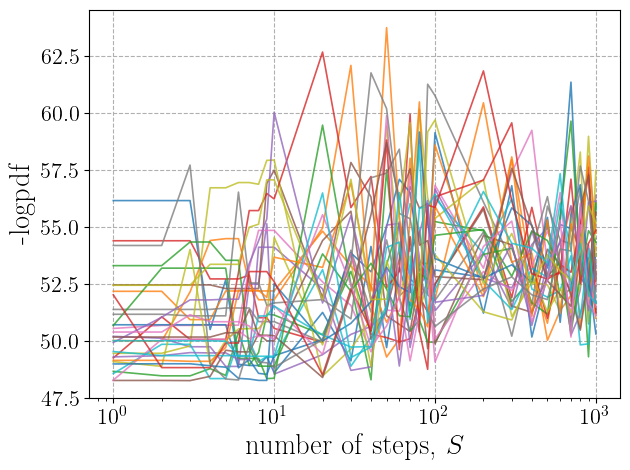

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.001991199999991977 s.


In [8]:
Sampler2.plot_chains_logpdf(n_chains=30)

In [9]:
[x.replace("C:\\Users\\Admin\\Dropbox\\Work\\09_Resources\\Git\\GitHub\\DNNLikelihood\\DNNLikelihood_dev\\tutorials\\toy\\outfiles","") for x in Sampler2.figures_list]

['\\toy_sampler_figure_GR_Rc_0.pdf',
 '\\toy_sampler_figure_GR_sqrtVhat_0.pdf',
 '\\toy_sampler_figure_GR_sqrtW_0.pdf',
 '\\toy_sampler_figure_GR_Rc_5.pdf',
 '\\toy_sampler_figure_GR_sqrtVhat_5.pdf',
 '\\toy_sampler_figure_GR_sqrtW_5.pdf',
 '\\toy_sampler_figure_distr_0.pdf',
 '\\toy_sampler_figure_distr_5.pdf',
 '\\toy_sampler_figure_autocorr_0.pdf',
 '\\toy_sampler_figure_autocorr_5.pdf',
 '\\toy_sampler_figure_chains_0.pdf',
 '\\toy_sampler_figure_chains_5.pdf',
 '\\toy_sampler_figure_chains_logpdf.pdf']

## Data

### Make data from sampler

In [2]:
Sampler2 = DNNLikelihood.Sampler(new_sampler=False,
                                 likelihood_script_file=None,#"outfiles/ATLAS_sbottom_search_92_region_A_patch_sbottom_1400_450_60_likelihood_script",
                                 likelihood=None,#lik,#
                                 nsteps_final=50000,
                                 moves_str="[(emcee.moves.StretchMove(), 0), (emcee.moves.GaussianMove(0.0002, mode='random',factor=None),1)]",
                                 parallel_CPU=True,
                                 vectorize=False,
                                 sampler_input_file="outfiles/toy_sampler",
                                 verbose=1)

Loaded sampler in 0.00667379999999973 .
Loaded likelihood in 0.006598299999998503 .
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.0037161999999995032 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.004985200000000134 s.
Initialize backend from file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 .
Please increase nsteps to run for more steps
Number of available steps: 3000. .
Loaded backend C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 for chains toy_sampler in 0.02758880000000019 s.
Sampler json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outf

In [3]:
Sampler2.nsteps_available

3000

In [4]:
data = Sampler2.get_data_object(nsamples=10000, burnin=500, thin=2, dtype='float64', test_fraction=0)

Notice: When requiring an unbiased data sample please check that the required burnin is compatible with MCMC convergence.
There are non-unique samples
10000 unique samples generated in 0.03401589999999999 s.
Data json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.json saved in 0.4021858999999992 s.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.log saved in 0.0006716999999980544 s.
Saved 10000 (data_X, data_Y) samples in data h5 file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.h5 in 0.003649100000000516 s.
The file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.log already exists. Renaming the old file.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelih

In [6]:
data_dic = list(data.__dict__.keys())
data_dic.sort()
data_dic

['data_X',
 'data_Y',
 'data_dictionary',
 'data_input_file',
 'data_input_h5_file',
 'data_input_json_file',
 'data_input_log_file',
 'data_output_h5_file',
 'data_output_json_file',
 'data_output_log_file',
 'dtype',
 'generic_pars_labels',
 'load_on_RAM',
 'log',
 'name',
 'ndims',
 'npoints',
 'output_folder',
 'pars_bounds',
 'pars_labels',
 'pars_pos_nuis',
 'pars_pos_poi',
 'test_fraction',
 'test_range',
 'train_range',
 'verbose']

In [9]:
str(data.data_X[0].dtype)

'float64'